Aim - To predict future ODI cricket match winner based on previous year's match result.

# Introduction

- Cricket is one of the most popular sports in world, especially in India. The game is highly uncertain.
- It is a sport which generates high revenue.
- What if the winner team of the match can be predicted before the match even began?
- Because we are predicting a output which is categorical value this is  a classification problem.

Datasets - (1971 - 2017) https://drive.google.com/file/d/1pgsiNGpcUxgdREAhiUMj0U2NhrtuAIo-/view

(2017 - 2021)https://drive.google.com/file/d/1yQ6UlLDHJtSQBwmi7-7Zydv9arXkC-AZ/view

## Dataset Desciption

The dataset folder contains the following file:

ODI-data-1971-2017.csv = 3932 rows x 7 columns

Columns Provided in the Dataset

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date

ODI-data-2017-2021.csv = 495 x 8 columns

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date
8. Unnamed: 0

# For this problem we will be using samples from 2010 to 2021.

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
# loading the datasets ODI_data_1971_2017 and ODI_data_2017_2021

ODI_data_1971_2017 = pd.read_csv('/content/ODI-data-1971-2017.csv')
ODI_data_2017_2021 = pd.read_csv('/content/ODI-Data-2017-2021.csv')

In [4]:
# ODI_data_1971_2017 data

ODI_data_1971_2017.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [3]:
# ODI_data_2017_2021 data

ODI_data_2017_2021.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,0,ODI # 3817,Australia,Pakistan,Australia,92 runs,Brisbane,"Jan 13, 2017"
1,1,ODI # 3818,Australia,Pakistan,Pakistan,6 wickets,Melbourne,"Jan 15, 2017"
2,2,ODI # 3819,India,England,India,3 wickets,Pune,"Jan 15, 2017"
3,3,ODI # 3820,Australia,Pakistan,Australia,7 wickets,Perth,"Jan 19, 2017"
4,4,ODI # 3821,India,England,India,15 runs,Cuttack,"Jan 19, 2017"


Droping rows of year 2017 pesent in ODI 2017 to 2021 dataset wich are alredy present in ODI 1971 to 2017 data

In [58]:
# Droping rows with index range 0 to 116

ODI_data_2017_2021 = ODI_data_2017_2021.drop(range(0,116))

# Resetting the index of the dataframe

ODI_data_2017_2021.reset_index(inplace=True)

# Dropping the extra 'index' column from dataframe

ODI_data_2017_2021 = ODI_data_2017_2021.drop(columns=['index'])

In [59]:
# Loading ODI_data_1971_2021 the dataset

ODI_data_1971_2021 = pd.concat([ODI_data_1971_2017,ODI_data_2017_2021], ignore_index=True)

In [7]:
# ODI_data_1971_2021 data

ODI_data_1971_2021

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Unnamed: 0
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",NaN
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",NaN
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",NaN
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",NaN
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",NaN
...,...,...,...,...,...,...,...,...
4306,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",490.0
4307,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",491.0
4308,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",492.0
4309,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",493.0


In [60]:
# Dropping the "Unnamed: 0" column


ODI_data_1971_2021.drop(columns=['Unnamed: 0'], inplace=True)

In [61]:
# Dropping the values from 0 to 2936 as it contains samples from before the year 2010
# And Storing all the remaining samples in a new dataframe

ODI_data_2010_2021 = ODI_data_1971_2021.drop(range(0,2936), axis=0)

In [62]:
# Resetting index of the new dataframe

ODI_data_2010_2021.reset_index(inplace=True)

In [63]:
# Removing extra 'index' Column from the new dataframe 

ODI_data_2010_2021 = ODI_data_2010_2021.drop(columns=['index'])

In [12]:
# ODI_data_2010_2021 data

ODI_data_2010_2021.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"


# Basic EDA

## Identifying the number of features or columns

In [13]:
# Checking all column names

ODI_data_2010_2021.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

In [14]:
ODI_data_2010_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   1375 non-null   object
 1   Team 1      1375 non-null   object
 2   Team 2      1375 non-null   object
 3   Winner      1375 non-null   object
 4   Margin      1326 non-null   object
 5   Ground      1375 non-null   object
 6   Match Date  1375 non-null   object
dtypes: object(7)
memory usage: 75.3+ KB


After checking the Dtypes of all the columns 
  1. object - String values
  3. All the columns are of string datatype

In [15]:
ODI_data_2010_2021.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,1375,1375,1375,1375,1326,1375,1375
unique,1375,23,23,25,213,124,1150
top,ODI # 2937,England,Pakistan,India,6 wickets,Dhaka,"Mar 6, 2018"
freq,1,141,175,164,126,87,4


In [16]:
# length of the datset 

print('ODI dataset length:', len(ODI_data_2010_2021))

ODI dataset length: 1375


In [17]:
# Count of unique values in each column

ODI_data_2010_2021.nunique()


Scorecard     1375
Team 1          23
Team 2          23
Winner          25
Margin         213
Ground         124
Match Date    1150
dtype: int64

In [18]:
# Checking for missing values in all the columnns of the dataset

ODI_data_2010_2021.isnull().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

By the observation gather from the ODI_data_2010_2021.info() , we can know there are missing values in the "Margin" column of dataset

## Chi-square Test

In [64]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):

  contingency_table = pd.crosstab(ODI_data_2010_2021[var_1], ODI_data_2010_2021[var_2])
  
  
  observed_values = contingency_table.values
  
  
  b = chi2_contingency(contingency_table)
  expected_values = b[3]
  
  
  no_of_rows = len(contingency_table.iloc[0:,0])
  no_of_columns = len(contingency_table.iloc[0,0:])
  degree_f= (no_of_rows-1)*(no_of_columns-1)
  print("Degree of Freedom: ",degree_f)
  
  
  alpha = 0.05
  print('Significance level: ',alpha)
  
  
  chi_square = sum([(o-e)**2./e for o, e in zip(observed_values,expected_values)])
  chi_square_statistic = chi_square[0]+chi_square[1]
  print("chi-square statistic: ",chi_square_statistic)
  
  
  critical_value = chi2.ppf(q=1-alpha, df=degree_f)
  print('critical_value:',critical_value)
  
 
  p_value = 1-chi2.cdf(x=chi_square_statistic, df=degree_f)

  print('p-value:',p_value)
        
  if chi_square_statistic>=critical_value:
      print("Reject H0,There is a relationship between 2 categorical variables")
  else:
      print("Retain H0,There is no relationship between 2 categorical variables")

  if p_value<=alpha:
      print("Reject H0,There is a relationship between 2 categorical variables")
  else:
      print("Retain H0,There is no relationship between 2 categorical variables")

In [65]:
# looping on whole dataset for performing chi-square test

for x in ODI_data_2010_2021.columns:
  for i in ODI_data_2010_2021.columns:
    if i!=x:
      print('chi-square test on: ',x,' ',i,'\n')
      perform_chi_square_test(x,i)
      print('-------------------------------------------------------\n')



chi-square test on:  Scorecard   Team 1 

Degree of Freedom:  30228
Significance level:  0.05
chi-square statistic:  2549.9999999999623
critical_value: 30633.567183419527
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-------------------------------------------------------

chi-square test on:  Scorecard   Team 2 

Degree of Freedom:  30228
Significance level:  0.05
chi-square statistic:  2592.0000000000355
critical_value: 30633.567183419527
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-------------------------------------------------------

chi-square test on:  Scorecard   Winner 

Degree of Freedom:  32976
Significance level:  0.05
chi-square statistic:  2557.000000000013
critical_value: 33399.55082702824
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
R

From above chi-square test:

There is correlation between Team 1 and Winner data.

# Group Plot

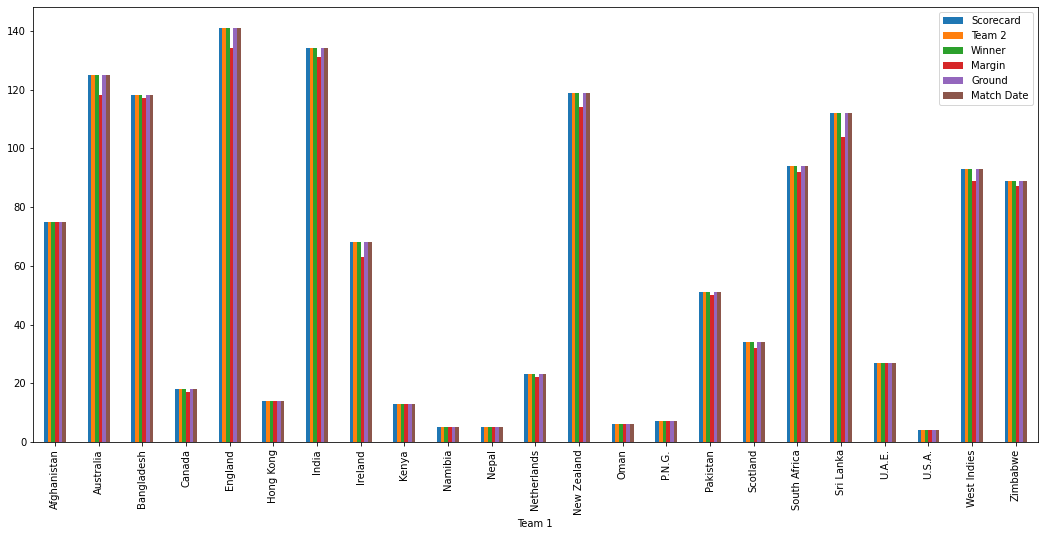

In [21]:
# grouping data by Team 1 and plotting count plot

ODI_data_2010_2021.groupby('Team 1').count().plot(kind='bar', figsize=(18,8))

from above graph:
1. There are more samples of team 1 as Australia, Bangladesh, England, India, New Zealand, West Indies, Zimbabwe as compared to other teams
2. Samples of team 1 as  Namibia, Oman, Nepal, P.N.G, U.S.A are very less

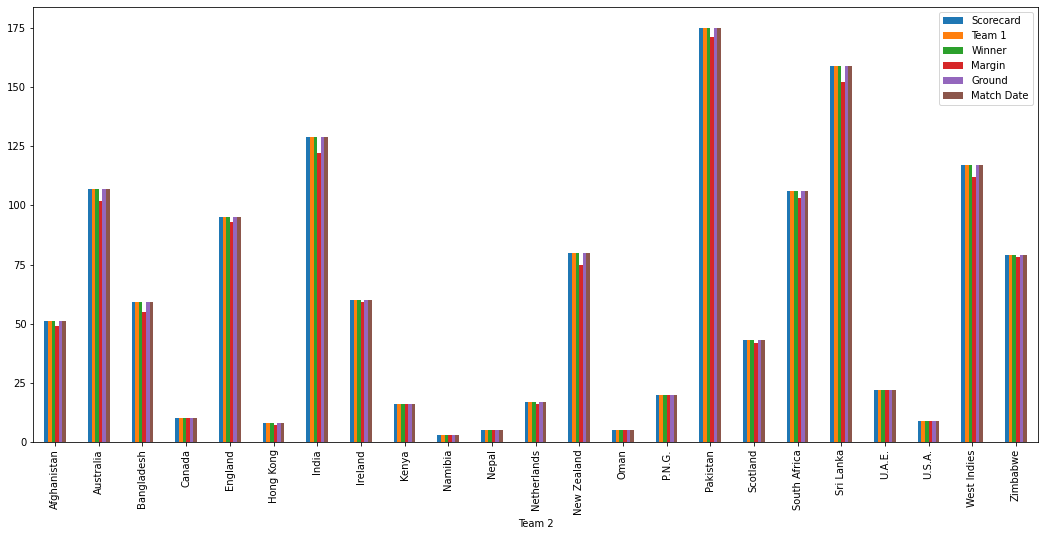

In [22]:
# grouping data by Team 2 and plotting count plot

ODI_data_2010_2021.groupby('Team 2').count().plot(kind='bar', figsize=(18,8))

from above graph:
1. There are more samples of team 2 as Afghanistan, Australia, Bangladesh, England, India, Pakistan, Ireland, New Zealand, West Indies, Sri Lanks, South Africa Zimbabwe as compared to other teams
2. Samples of team 2 as  Namibia, Oman, Nepal, P.N.G, U.S.A, kenya, Hong Kong, Canada are very less

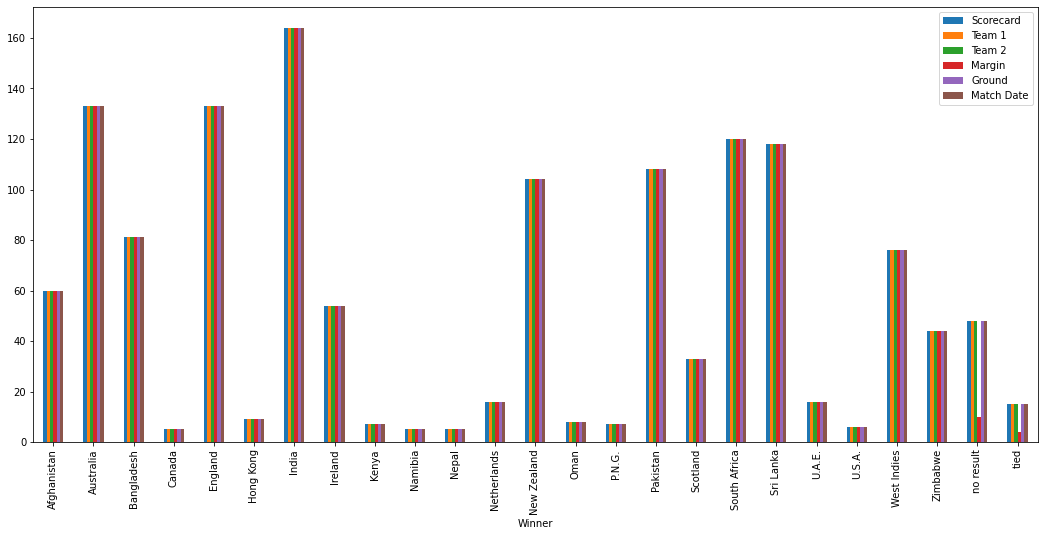

In [23]:
# grouping data by Winner and plotting count plot

ODI_data_2010_2021.groupby('Winner').count().plot(kind='bar', figsize=(18,8))

from above graph:
1. There are more samples of Winner as Australia, Bangladesh, England, India, Pakistan, New Zealand, West Indies, Zimbabwe, South Africa, Sri Lanka as compared to other teams
2. Samples of Winner as Canada, Hong Kong, Kenya, Namibia, Oman, Nepal, P.N.G, U.S.A are very less
3. Also there are many matches with no result nad few which were tied.

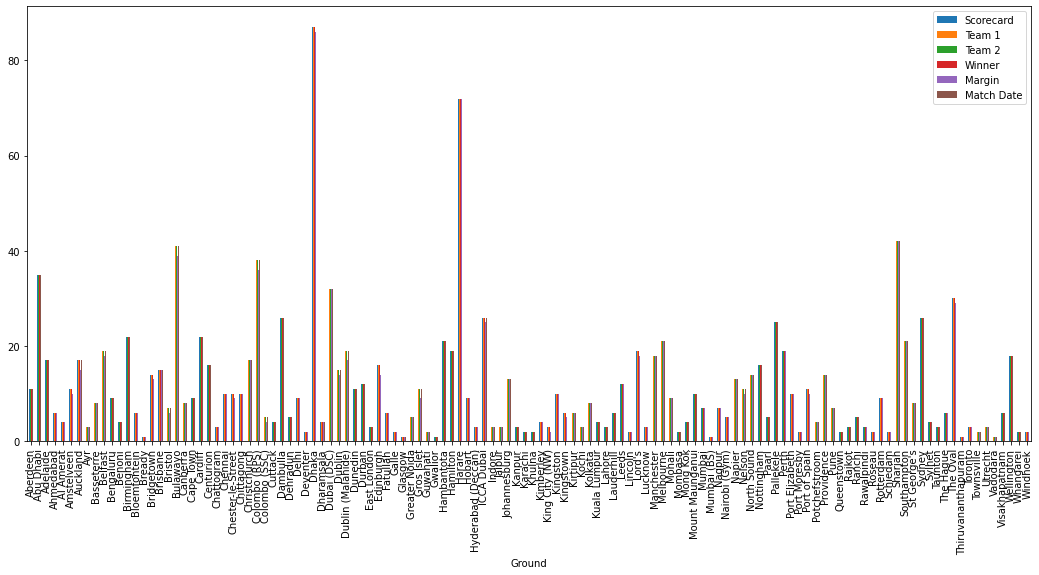

In [24]:
# grouping data by Ground and plotting count plot

ODI_data_2010_2021.groupby('Ground').count().plot(kind='bar', figsize=(18,8))

from above graph:
1. There are more samples of ground Dhaka, Harare, Abu dhabi, Bulawayo, Colombo (RPS), Sharjah

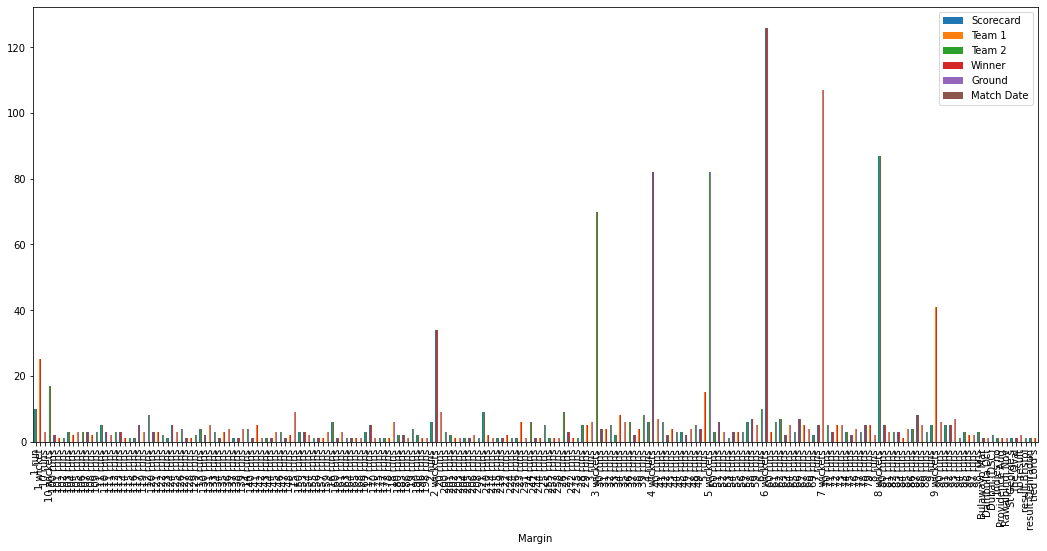

In [25]:
# grouping data by Margin and plotting count plot

ODI_data_2010_2021.groupby('Margin').count().plot(kind='bar', figsize=(18,8))

from above graph:
1. Few Matches margin are very high then other matches, we need two sclae these numbers.

## Catplot

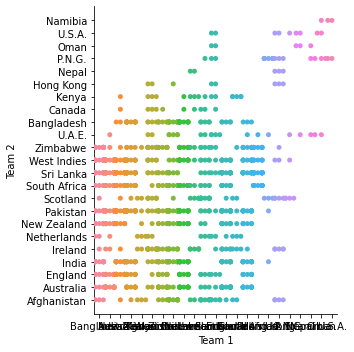

In [26]:
# cat plot between Team 1 and Team 2 column using kind="swarm"

sns.catplot(x='Team 1', y='Team 2', kind= 'swarm', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

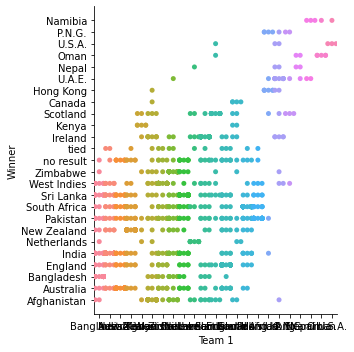

In [28]:
# cat plot between Team 1 and Winner column using kind="swarm"

sns.catplot(x='Team 1', y='Winner', kind= 'swarm', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

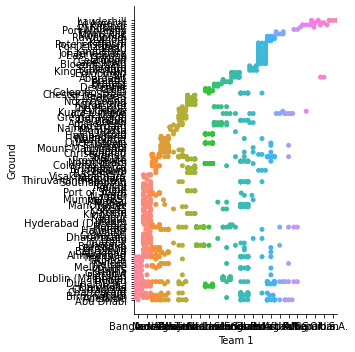

In [29]:
# cat plot between Team 1 and Ground column using kind="swarm"

sns.catplot(x='Team 1', y='Ground', kind= 'swarm', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

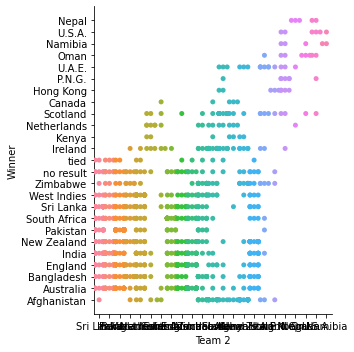

In [30]:
# cat plot between Team 2 and Winner column using kind="swarm"

sns.catplot(x='Team 2', y='Winner', kind= 'swarm', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

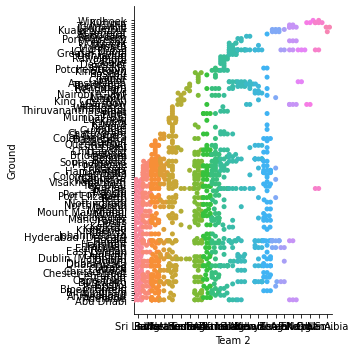

In [31]:
# cat plot between Team 2 and Ground column using kind="swarm"

sns.catplot(x='Team 2', y='Ground', kind= 'swarm', data=ODI_data_2010_2021)
plt.show()


From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

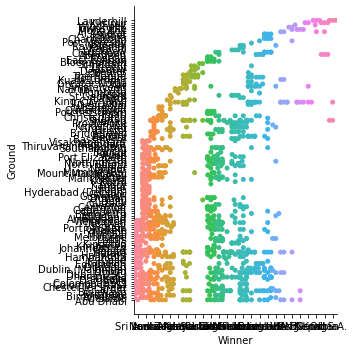

In [32]:
# cat plot between Winner and Ground column using kind="swarm"

sns.catplot(x='Winner', y='Ground', kind= 'swarm', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

# Strip Plot

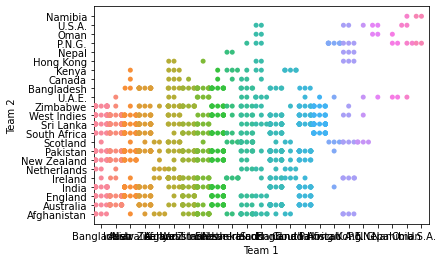

In [34]:
# swarm plot between Team 1 and Team 2 column

sns.swarmplot(x='Team 1', y='Team 2', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

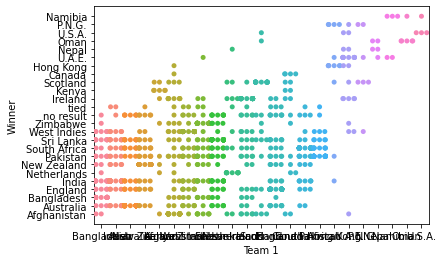

In [35]:
# swarm plot between Team 1 and Winner column

sns.swarmplot(x='Team 1', y='Winner', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

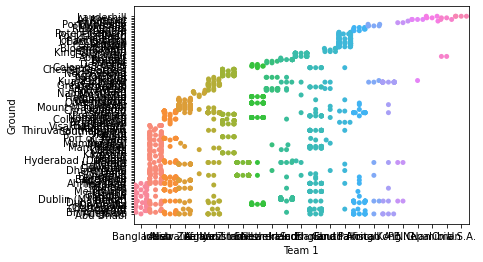

In [36]:
# swarm plot between Team 1 and Ground column

sns.swarmplot(x='Team 1', y='Ground', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

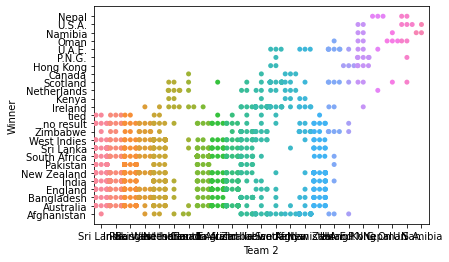

In [37]:
# swarm plot between Team 2 and Winner column

sns.swarmplot(x='Team 2', y='Winner', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

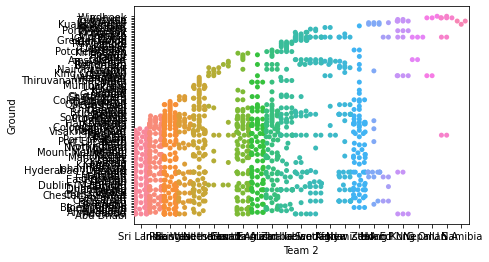

In [38]:
# swarm plot between Team 2 and Ground column

sns.swarmplot(x='Team 2', y='Ground', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

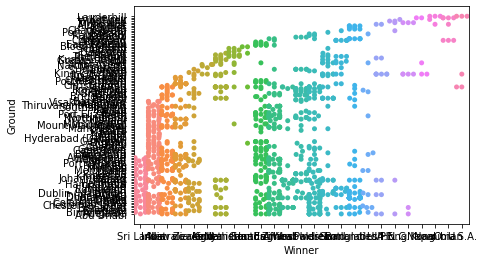

In [39]:
# swarm plot between Winner and Ground column

sns.swarmplot(x='Winner', y='Ground', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

# Strip Plot

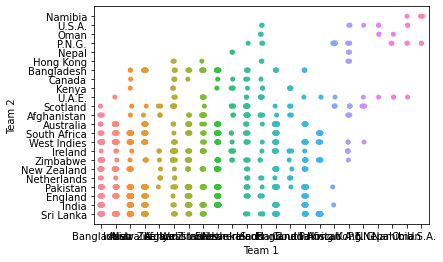

In [40]:
# strip plot between Team 1 and Team 2 column

sns.stripplot(x='Team 1', y='Team 2', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

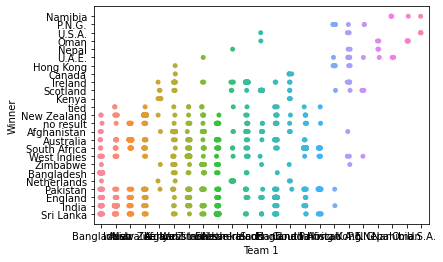

In [41]:
# strip plot between Team 1 and Winner column

sns.stripplot(x='Team 1', y='Winner', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

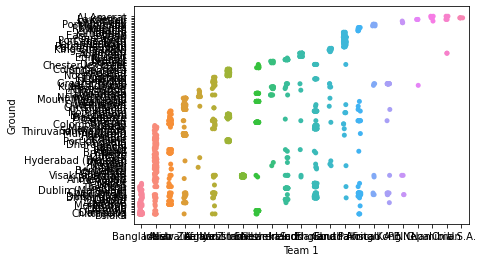

In [42]:
# strip plot between Team 1 and Ground column

sns.stripplot(x='Team 1', y='Ground', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

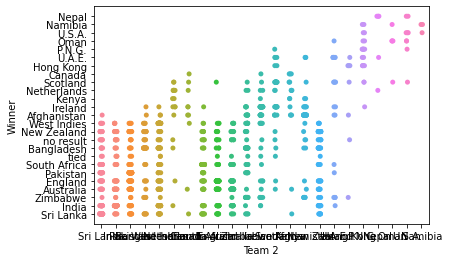

In [43]:
# strip plot between Team 2 and Winner column

sns.stripplot(x='Team 2', y='Winner', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

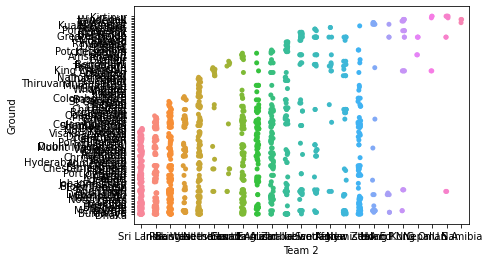

In [44]:
# strip plot between Team 2 and Ground column

sns.stripplot(x='Team 2', y='Ground', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

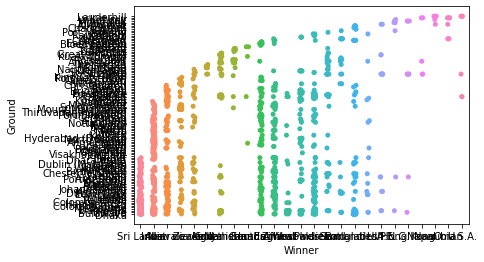

In [45]:
# strip plot between Winner and Ground column

sns.stripplot(x='Winner', y='Ground', data=ODI_data_2010_2021)
plt.show()

From the above graph:
1. Many Winner teams are having matches repeatedly at a particular range of ground.

## Count Plot

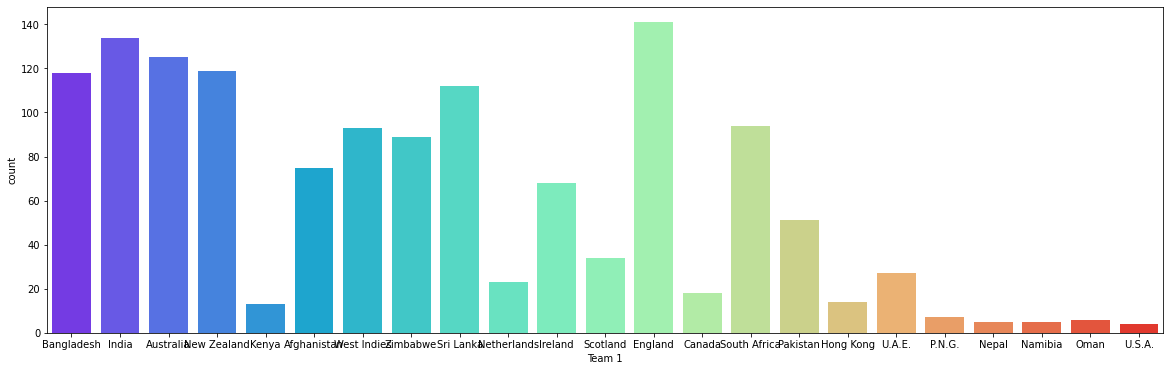

In [46]:
# count plot for Team 1 column

plt.figure(figsize=(20,6))
sns.countplot(x='Team 1', data=ODI_data_2010_2021, palette = 'rainbow')
plt.show()

From above count plot

distribution of values of Team 1 is not equal over complete dataset, skewed left multimodel.

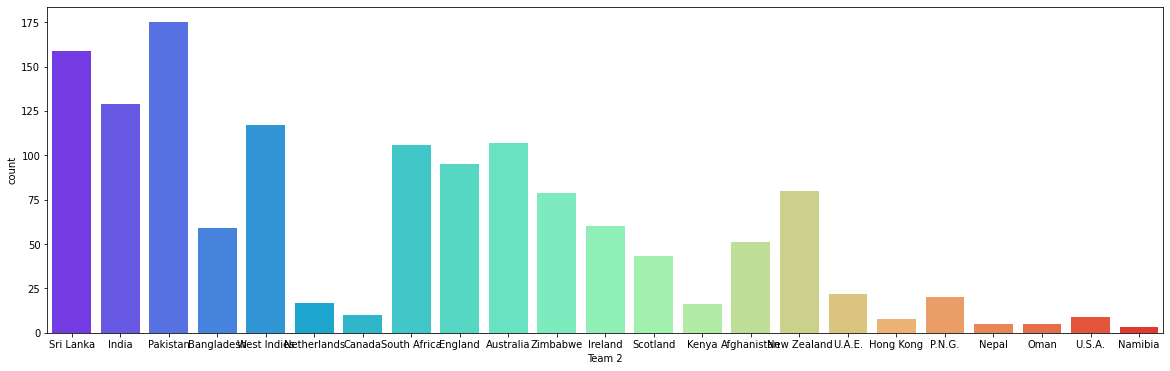

In [47]:
# count plot for Team 2 column

plt.figure(figsize=(20,6))
sns.countplot(x='Team 2', data=ODI_data_2010_2021, palette = 'rainbow')
plt.show()

From above count plot

distribution of values of team 2 is not equal over complete dataset, skewed left.

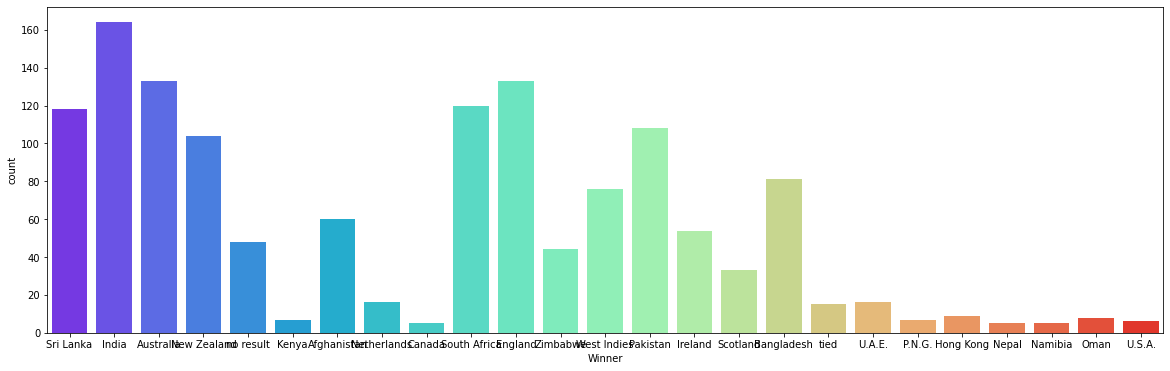

In [48]:
# count plot for Winner column

plt.figure(figsize=(20,6))
sns.countplot(x='Winner', data=ODI_data_2010_2021, palette = 'rainbow')
plt.show()

From above count plot

distribution of values of winner teams is not equal over complete dataset, skewed left, multimodel.

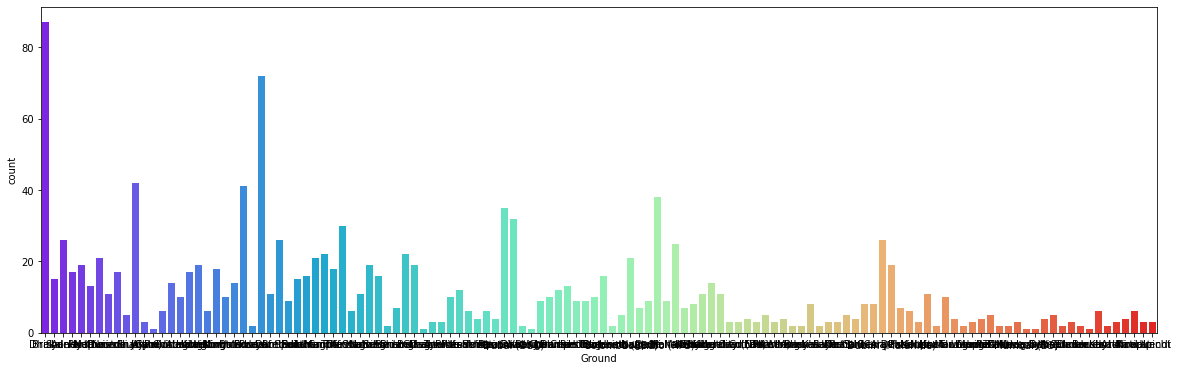

In [49]:
# count plot for Ground column

plt.figure(figsize=(20,6))
sns.countplot(x='Ground', data=ODI_data_2010_2021, palette = 'rainbow')
plt.show()

From above count plot

distribution of values of ground is not equal over complete dataset, multimodel.

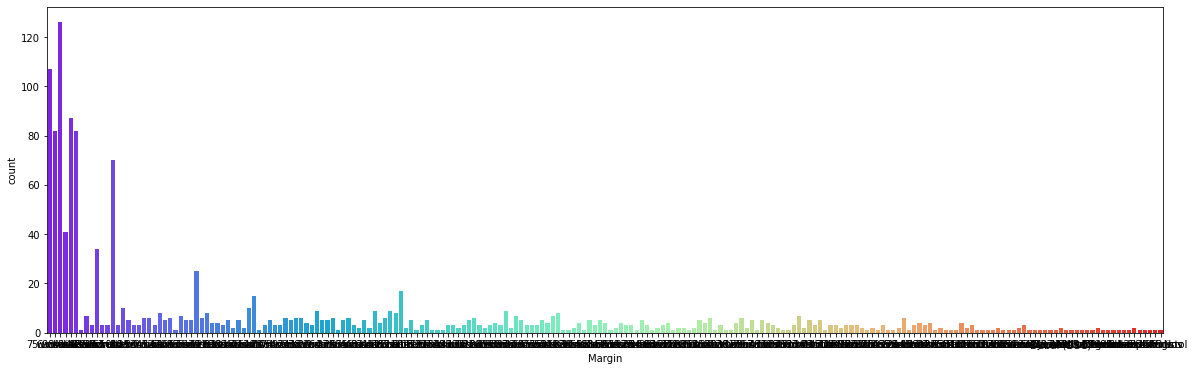

In [ ]:
# count plot for Margin column

plt.figure(figsize=(20,6))
sns.countplot(x='Margin', data=ODI_data_2010_2021, palette = 'rainbow')
plt.show()

From above count plot

distribution of values of Margin is not equal over complete dataset, skewed left.

## Dendrogram

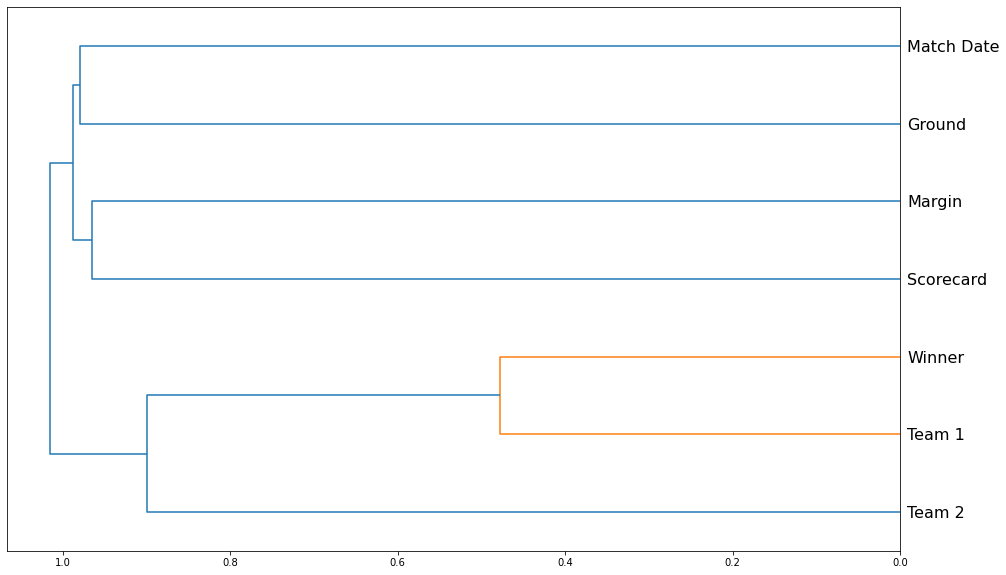

In [66]:
X = ODI_data_2010_2021.dropna()

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()

observation from dendrogram

Strongly correlated variables:
    Team 1 and Winner

Since there are missing values in the Margin column of dataset we need to drop those empty columns because all of the data is categorical and if we replace the missing values with random values it will affect the correctness of prediction.

In [67]:
# Droping rows with missing values
ODI_data_2010_2021 = ODI_data_2010_2021.dropna()

ODI_data_2010_2021.reset_index(inplace=True)

ODI_data_2010_2021 = ODI_data_2010_2021.drop(columns=['index'])


In [68]:
# Filtering out the rows which contain winner column values as 'no result' and 'tied'

ODI_data_2010_2021 = ODI_data_2010_2021[(ODI_data_2010_2021['Winner']!= 'no result')&(ODI_data_2010_2021['Winner']!='tied')]

ODI_data_2010_2021.reset_index(inplace=True)
ODI_data_2010_2021 = ODI_data_2010_2021.drop(columns=['index'])


## Feature Engineering
It is one of the most important step in workflow of machine learning. Machine learning model work well if the data provided to the model is relevant and useful.

We can break down the
Margin column which is Object data type into two columns named Won by runs and won by wickets both are numerical datatype int64


In [76]:
# Create a list for storing runs
won_by_runs = []
# Create a list for storing wickets
won_by_wickets = []
# looping through dataset column Margin

for margin in ODI_data_2010_2021['Margin']:
  splitted_data = margin.split(' ')

  try:
    index = splitted_data.index('run')
    won_by_runs.append(int(splitted_data[index - 1]))
    won_by_wickets.append(0)
  except:
    print('-')
  try:
    index = splitted_data.index('runs')
    won_by_wickets.append(int(splitted_data[index - 1]))
    won_by_runs.append(0)
  except:
    print('-')
  try:
    index = splitted_data.index('wicket')
    won_by_wickets.append(int(splitted_data[index - 1]))
    won_by_runs.append(0)
  except:
    print('-')
  try:
    index = splitted_data.index('wickets')
    won_by_wickets.append(int(splitted_data[index - 1]))
    won_by_runs.append(0)
  except:
    print('-')

ODI_data_2010_2021['Won_By_Runs'] = won_by_runs
ODI_data_2010_2021['Won_By_Wickets'] = won_by_wickets

ODI_data_2010_2021
  

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,won_By_Wickets,Won_By_Wickets
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,7
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,5
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,6
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,9
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,8
...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,3
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",0,133,133
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,4
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,3


# Further feature engineering

We can create a two new columns named team_1_first_batting and team_2_first_batting from Won_by_runs and Won_by_wickets

If a team wins by run it means that the team got first chance for batting else if a team wins by wickets that means the team got first chance for bowling.

In [78]:
team_1_first_batting = []
team_2_first_batting = []

for team1,team2,wickets,runs,winner in zip(ODI_data_2010_2021['Team 1'], ODI_data_2010_2021['Team 2'], ODI_data_2010_2021['Won_By_Wickets'], ODI_data_2010_2021['Won_By_Runs'], ODI_data_2010_2021['Winner']):
  if int(runs) > 0 and winner == team1:
    team_1_first_batting.append(1)
    team_2_first_batting.append(0)
  elif int(runs) > 0 and winner == team2:
    team_1_first_batting.append(0)
    team_2_first_batting.append(1)
  elif int(wickets) > 0 and winner == team1:
    team_1_first_batting.append(0)
    team_2_first_batting.append(1)
  elif int(wickets) > 0 and winner == team2:
    team_1_first_batting.append(1)
    team_2_first_batting.append(0)

ODI_data_2010_2021['Team_1_First_Batting'] = team_1_first_batting
ODI_data_2010_2021['Team_2_First_Batting'] = team_2_first_batting

In [79]:
ODI_data_2010_2021

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,won_By_Wickets,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,7,1,0
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,5,1,0
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,6,1,0
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,9,1,0
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,3,1,0
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",0,133,133,1,0
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,4,0,1
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,3,0,1


### Dealing with Multi Class Problem

Instead of using winner team name as target values we can use, 1 to represent team 1 as winner and 2 to represent team 2 as winner. It will reduce multiclass classification problem as using team name as label we the model have to decide correct label from more than 10 labels. Hence, using only two labels will improve the performance of the model.

In [80]:
winning_team = []

for team1, team2, winner in zip(ODI_data_2010_2021['Team 1'], ODI_data_2010_2021['Team 2'], ODI_data_2010_2021['Winner']):
  if winner == team1:
    winning_team.append(1)
  elif winner == team2:
    winning_team.append(2)

ODI_data_2010_2021['Winning_team'] = winning_team

In [81]:
ODI_data_2010_2021

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,won_By_Wickets,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,3,1,0,2
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",0,133,133,1,0,2
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,4,0,1,1
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,3,0,1,1


## Scaling

In [82]:
# Function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  df[col] = scaler.fit_transform(df[col])
  return df
    

In [83]:
col_train = ['Won_By_Runs', 'Won_By_Wickets']

ODI_data_2010_2021 = scale_data(ODI_data_2010_2021,col_train)

In [84]:
# Dumifying the dataset columns Team 1 and Team 2 and storing it in a new variable

dummified_data = pd.get_dummies(ODI_data_2010_2021, prefix=['Team 1', 'Team 2'], columns=['Team 1', 'Team 2'])

In [85]:
dummified_data

,Scorecard,Winner,Margin,Ground,Match Date,Won_By_Runs,won_By_Wickets,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,ODI # 2937,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0.0,7,0.025455,1,0,...,0,0,0,0,0,1,0,0,0,0
1,ODI # 2938,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0.0,5,0.018182,1,0,...,0,0,0,0,0,1,0,0,0,0
2,ODI # 2939,India,6 wickets,Dhaka,"Jan 7, 2010",0.0,6,0.021818,1,0,...,0,0,0,0,0,0,0,0,0,0
3,ODI # 2940,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0.0,9,0.032727,1,0,...,0,0,0,0,0,1,0,0,0,0
4,ODI # 2941,India,8 wickets,Dhaka,"Jan 10, 2010",0.0,8,0.029091,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0.0,3,0.010909,1,0,...,0,0,0,0,0,0,0,0,0,0
1308,ODI # 4310,Australia,133 runs,Bridgetown,"Jul 20, 2021",0.0,133,0.483636,1,0,...,0,0,0,0,0,0,0,0,0,0
1309,ODI # 4311,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0.0,4,0.014545,0,1,...,0,0,0,0,0,0,0,0,0,0
1310,ODI # 4312,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0.0,3,0.010909,0,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Seperating feature and target variables

X = dummified_data.drop(columns=['Scorecard', 'Margin', 'Winner', 'Ground', 'Winning_team', 'Match Date'])
y = ODI_data_2010_2021['Winning_team']

In [87]:
# Creating test_data_X and test_data_y variables with samples of 2021 data

test_data_X = X[1269:]
test_data_y = y[1269:]

In [88]:
X = X.drop(range(1269,1312), axis=0)


In [89]:
y = y.drop(range(1269,1312), axis=0)

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size = 0.8, random_state=123)

## Modeling

In [91]:
# importing necessary libraries for calculating metrics of model

import math 
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Function for calculating all the relevant metrics with parameter as model instance

def print_score(m):
  res = classification_report(y_valid, m.predict(X_valid))
  print('Classification Report \n', res)

In [92]:
# Visualizing importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
  
  feature_importance_df = pd.DataFrame()

  _df = pd.DataFrame()
  _df['feature_importance'] = feature_importances
  _df['column'] = feat_train_df.columns
  feature_importance_df = pd.concat([feature_importance_df, _df], 
                                    axis=0, ignore_index=True)
  


  # grouping all data and sorting in descending order
  order = feature_importance_df.groupby('column')\
      .sum()[['feature_importance']]\
      .sort_values('feature_importance', ascending=False).index[:50]

  # ploting feature importance data using boxenplot
  fig, ax = plt.subplots(figsize=(8, max(6, len(order)* .25)))
  sns.boxenplot(data=feature_importance_df, x='feature_importance', y='column', order=order, ax=ax, palette='viridis', orient='h')
  ax.tick_params(axis='x', rotation =0)
  ax.set_title('Importance')
  ax.grid()
  fig.tight_layout()

  return fig, ax
    


### LogisticRegression

Training set accuracy: 0.994
Test set accuracy: 0.988
Classification Report 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       151
           2       0.99      0.98      0.99       103

    accuracy                           0.99       254
   macro avg       0.99      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254

CPU times: user 520 ms, sys: 172 ms, total: 692 ms
Wall time: 859 ms


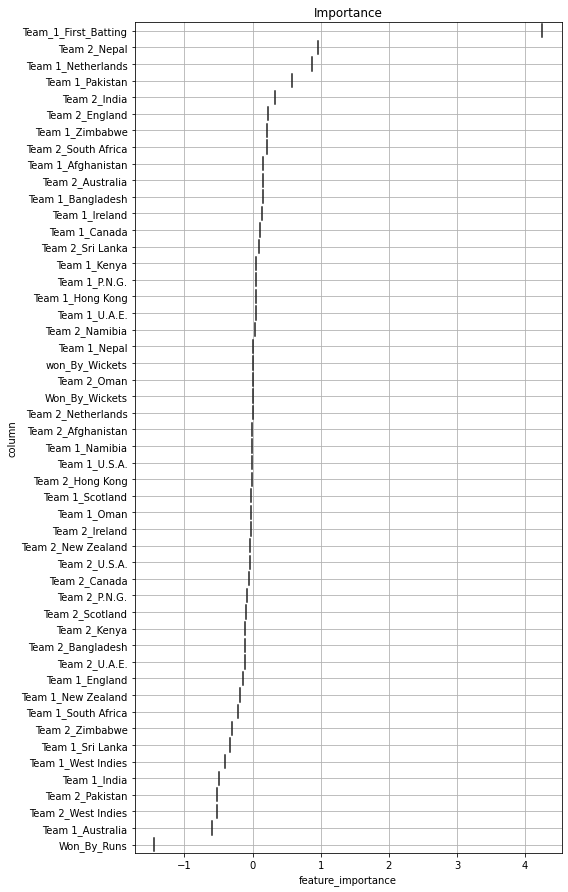

In [95]:
%%time
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()

log_clf.fit(X_train, y_train)

score = log_clf.score(X_train, y_train)
score2 = log_clf.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))

print_score(log_clf)
fig, ax = visualize_importance(log_clf.coef_[0],X)

### RandomForestClassifier

Training set accuracy: 1.000
Test set accuracy: 0.992
Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       151
           2       1.00      0.98      0.99       103

    accuracy                           0.99       254
   macro avg       0.99      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254

CPU times: user 452 ms, sys: 16.7 ms, total: 468 ms
Wall time: 460 ms


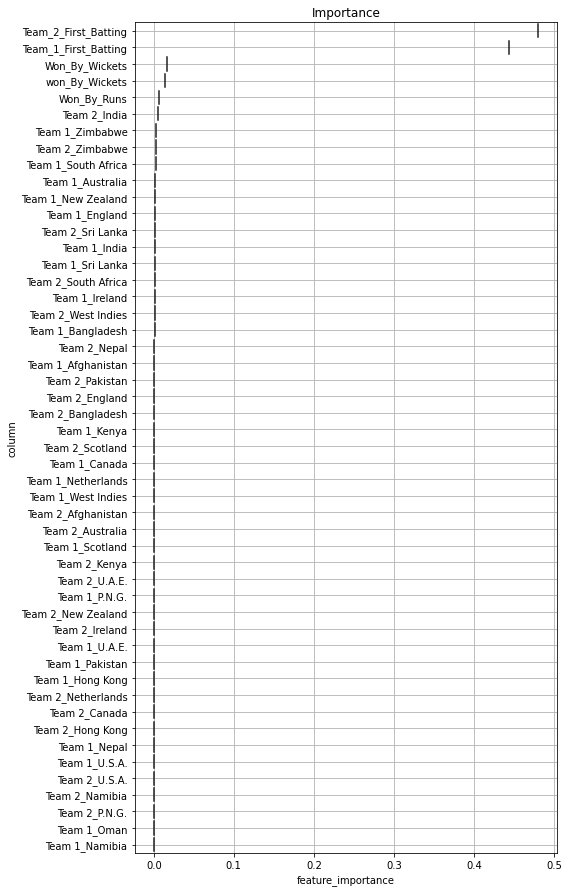

In [97]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score = rf.score(X_train, y_train)
score2 = rf.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))

print_score(rf)
fig, ax = visualize_importance(rf.feature_importances_,X)


### XGBClassifier

Training set accuracy: 0.998
Test set accuracy: 0.992
Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       151
           2       1.00      0.98      0.99       103

    accuracy                           0.99       254
   macro avg       0.99      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254

CPU times: user 509 ms, sys: 15 ms, total: 524 ms
Wall time: 542 ms


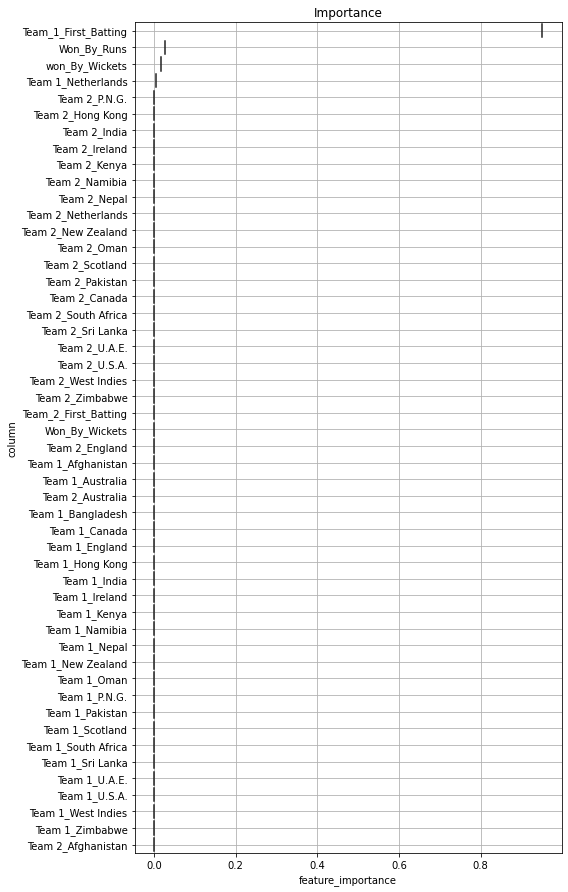

In [100]:
%%time
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

score = xgb.score(X_train, y_train)
score2 = xgb.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))

print_score(xgb)
fig, ax = visualize_importance(xgb.feature_importances_,X)


### Support Vector Classifier

In [101]:
%%time
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

score = svc.score(X_train, y_train)
score2 = svc.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))

print_score(svc)


Training set accuracy: 0.598
Test set accuracy: 0.587
Classification Report 
               precision    recall  f1-score   support

           1       0.59      0.97      0.74       151
           2       0.33      0.02      0.04       103

    accuracy                           0.59       254
   macro avg       0.46      0.50      0.39       254
weighted avg       0.49      0.59      0.45       254

CPU times: user 353 ms, sys: 3.41 ms, total: 356 ms
Wall time: 524 ms


### GaussianNB

In [102]:
%%time
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB.fit(X_train, y_train)

score = GNB.score(X_train, y_train)
score2 = GNB.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))

print_score(GNB)


Training set accuracy: 0.994
Test set accuracy: 0.984
Classification Report 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       151
           2       0.98      0.98      0.98       103

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254

CPU times: user 31.9 ms, sys: 0 ns, total: 31.9 ms
Wall time: 35.1 ms


### K Neighbors Classifier

In [103]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

score = knn.score(X_train, y_train)
score2 = knn.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))

print_score(knn)



Training set accuracy: 0.965
Test set accuracy: 0.933
Classification Report 
               precision    recall  f1-score   support

           1       0.94      0.95      0.94       151
           2       0.93      0.90      0.92       103

    accuracy                           0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254

CPU times: user 205 ms, sys: 29.3 ms, total: 234 ms
Wall time: 573 ms


### Decision Tree Classifier

In [104]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score = dt.score(X_train, y_train)
score2 = dt.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))




Training set accuracy: 1.000
Test set accuracy: 1.000
CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 15.6 ms


### Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [105]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

GBR = GradientBoostingClassifier()

GBR.fit(X_train, y_train)

score = GBR.score(X_train, y_train)
score2 = GBR.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))

print_score(GBR)


Training set accuracy: 1.000
Test set accuracy: 1.000
Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00       103

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254

CPU times: user 160 ms, sys: 607 µs, total: 160 ms
Wall time: 162 ms


### Bagging Classifier

In [106]:
%%time
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()

bg.fit(X_train, y_train)

score = bg.score(X_train, y_train)
score2 = bg.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))

print_score(bg)



Training set accuracy: 1.000
Test set accuracy: 1.000
Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00       103

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254

CPU times: user 84.5 ms, sys: 658 µs, total: 85.1 ms
Wall time: 92.6 ms


### AdaBoost Classifier

In [109]:
%%time
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier()

Ada.fit(X_train, y_train)

score = Ada.score(X_train, y_train)
score2 = Ada.score(X_valid, y_valid)
print('Training set accuracy:', '%.3f'%(score))
print('Test set accuracy:', '%.3f'%(score2))

print_score(Ada)



Training set accuracy: 0.995
Test set accuracy: 0.984
Classification Report 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       151
           2       0.98      0.98      0.98       103

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254

CPU times: user 320 ms, sys: 5 µs, total: 320 ms
Wall time: 341 ms


### Now working with test dataset (year 2021 matches)

In [110]:
# test data labels 

test_y_df = pd.DataFrame(data=test_data_y)
test_y_df

,Winning_team
1269,2
1270,1
1271,1
1272,1
1273,1
1274,1
1275,1
1276,1
1277,1
1278,1


In [112]:
# Creating a dataframe for with data Team 1 , Team 2 and Winner with data of all year 2021 matches

match_result = pd.DataFrame()
match_result['Team 1'] = ODI_data_2010_2021['Team 1'][1269:]
match_result['Team 2'] = ODI_data_2010_2021['Team 2'][1269:]
match_result['Winner'] = ODI_data_2010_2021['Winner'][1269:]
match_result

,Team 1,Team 2,Winner
1269,U.A.E.,Ireland,Ireland
1270,Bangladesh,West Indies,Bangladesh
1271,Afghanistan,Ireland,Afghanistan
1272,Bangladesh,West Indies,Bangladesh
1273,Afghanistan,Ireland,Afghanistan
1274,Bangladesh,West Indies,Bangladesh
1275,Afghanistan,Ireland,Afghanistan
1276,West Indies,Sri Lanka,West Indies
1277,West Indies,Sri Lanka,West Indies
1278,West Indies,Sri Lanka,West Indies


In [113]:
# Predicting on test data 

predicted_winner = knn.predict(test_data_X)

res = pd.DataFrame()

res['Actual'] = test_y_df['Winning_team']
res['Predicted'] = predicted_winner

pred_winner = []

for pred, team1, team2 in zip(res['Predicted'], match_result['Team 1'],match_result['Team 2']):
  if pred == 1:
    pred_winner.append(team1)
  elif pred == 2:
    pred_winner.append(team2)

match_result['Pred_winner'] = pred_winner

In [114]:
# match_result data

match_result

,Team 1,Team 2,Winner,Pred_winner
1269,U.A.E.,Ireland,Ireland,U.A.E.
1270,Bangladesh,West Indies,Bangladesh,Bangladesh
1271,Afghanistan,Ireland,Afghanistan,Afghanistan
1272,Bangladesh,West Indies,Bangladesh,Bangladesh
1273,Afghanistan,Ireland,Afghanistan,Afghanistan
1274,Bangladesh,West Indies,Bangladesh,Bangladesh
1275,Afghanistan,Ireland,Afghanistan,Afghanistan
1276,West Indies,Sri Lanka,West Indies,West Indies
1277,West Indies,Sri Lanka,West Indies,West Indies
1278,West Indies,Sri Lanka,West Indies,West Indies


## Conclusion

As we used different models for predicting match winner, we have seen that Random forest outperformed all other model with an accuracy of 100% on train data set and around 98% on validation set with f1 score more than 95%.

Also other models such as SVC, KNN classifier, Decision tree classifier and Gradient Boost classifier performed really well with acuarcy more than 90% and f1 score above 90%.

The prediction of winner in matches played in year 2021 were almost all were predicted correctly.